<a id=top></a>

# Recurrence Measurements

<center> <img src=img/recurrence_crop.png  width=80%> </center> 


<br>

## Notebook Overview
 
 
### <a href='#intro'> 1) Introduction to Recurrence Measurements </a>

### <a href='#imports'> 1) Imports </a>

### <a href='#load_data'> 2) Recurrence Dataset </a>
   
### <a href='#instantiate'> 3) Measurement Object Instantiation </a>

### <a href='#rundown'> 4) Rundown of Recurrence Measurements </a>

### <a href='#questions'> 5) Bonus Exercise </a>



<br><br>

<a id=intro></a>

## Introduction to Recurrence Measurements
[Jump to top](#top)

Recurrence measurements are designed to measure the patterns of renewed bursts of activity for a given piece of information &mdash; for example, we see recurrence of the **red** topic in the timeline above.  These patterns may be caused by:
1. Content jumping to new communities causing a new spike in attention
2. External events related to the topic of interest which spark renewed interest by users
3. Persistant efforts of groups of users to continue to share the content

For burst detection, we look at the time series of related-event counts for each information unit and use the [Kleinberg burst detection algorithm](https://nikkimarinsek.com/blog/kleinberg-burst-detection-algorithm) to detect periods of elevated activity above the baseline levels for that piece of information. 

<center> <img src=img/bursts_example.png  width=80%> </center> 

To identify bursts in the multi-platform spread of a piece of information, we first seperately detect bursts on each of the individual platform because each platform may have different patterns of baseline activity.  

<center> <img src=img/bursts_multi.png  width=80%> </center> 


Then we merge overlapping bursts into a single burst event that spans across multiple platforms.


<center> <img src=img/bursts_multi_merged.png  width=80%> </center> 


Once we identify the bursts associated with each unit of information, we can measure both the properties of bursts for specific units of information and the distributions of these properties across groups of information.

<a id=imports></a>

## Imports
[Jump to top](#top)

First, import the necessary packages. In this notebook we only require one package:

- **socialsim** 

In [1]:
import socialsim as ss

/Users/grac833/anaconda3/envs/socsim_test_env2/lib/python3.6/site-packages/pysal/lib/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
/Users/grac833/anaconda3/envs/socsim_test_env2/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
/Users/grac833/Documents/Projects/SocialSim/temp/temp/socialsim_package_docker/socialsim/measurements/social_structure.py:13: UserWarning: SNAP import failed. Using igraph version of code instead.
  warnings.warn('SNAP import failed. Using igraph version of code instead.')


If you were unable to install SNAP, run the cell below and then re-run the cell above to ignore the warnings about backend code switching to SNAP workarounds using python-igraph only:

In [2]:
import warnings
warnings.filterwarnings("ignore")

<a id=load_data></a>


<br>

## Recurrence Dataset
[Jump to top](#top)

Next, load the dataset we are going to use in this notebook **tutorial_recurrence.json** that should be located in your **./data/** folder:

In [3]:
dataset_path = '../data/tutorial_recurrence.json' 
dataset = ss.load_data(dataset_path, verbose=False)

To explore the recurrence measurements, we will first focus on three pieces of information of interest:
    - CVE-2015-1805
<centering> <img src="img/CVE_2015_1805.png" width="800"></img> </centering> 
    
    - notpetya
    
<centering> <img src="img/notpetya.png" width="800"></img> </centering> 

    - nmap
    
<centering> <img src="img/nmap.png" width="800"></img> </centering> 

In [4]:
dataset.head()

,actionType,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,comment,CVE-2015-1805,t1_BtPCSWfYHeXRfBgVf8ol3w,2016-03-19 08:18:17,pu-uOYtuRZnvNyZNfCUqBw,t1_i2xaCQGYUiB64ETwxTw59Q,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
1,comment,CVE-2015-1805,t1_Cmls_wynhnvIqpBZEpSUTw,2016-03-19 09:04:55,O5EZzKjvQ9_48x_adKt1WQ,t1_BtPCSWfYHeXRfBgVf8ol3w,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
2,comment,CVE-2015-1805,t1_OQd6rU-E-XkVzE84XSvDrg,2016-03-19 09:16:34,[Deleted],t1_Cmls_wynhnvIqpBZEpSUTw,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
3,comment,CVE-2015-1805,t1_211bjV53KQ7ZFfgw9iEm1Q,2016-03-19 09:23:09,8EmGX5vN0-f_LfveaZ6EtA,t1_BtPCSWfYHeXRfBgVf8ol3w,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
4,comment,CVE-2015-1805,t1_oNat_wyGlxlQq5i24fufaw,2016-03-19 09:33:43,dWrkaIdRIFdWHh5jWFDOhQ,t1_OQd6rU-E-XkVzE84XSvDrg,reddit,t3_8tRvW0bjtsh0_yob-mLIUA


<a id=instantiate></a>

<br>

## Measurement Object Instantiation 
[Jump to top](#top)


First, we need to instantiate the **RecurrenceMeasurements** object. 

When we instantiate a new **RecurrenceMeasurements** object and pass **plot=True**, figures that illustrate the recurrence with burst windows shaded in grey will be plotted for each of the events/topics included in the **informationID** column of our dataframe. In the following code cell, we also pass a directory to save the plots in **plot_dir='./plots/'** where these plots will be saved separately.

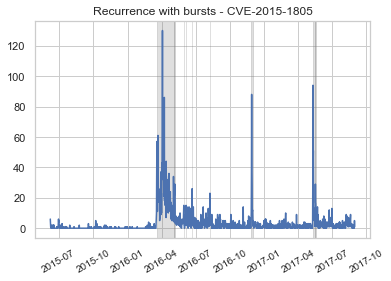

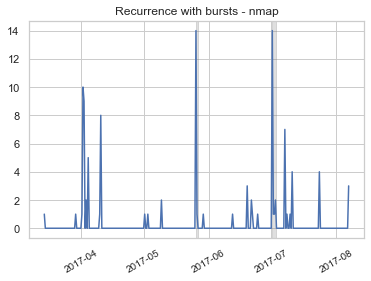

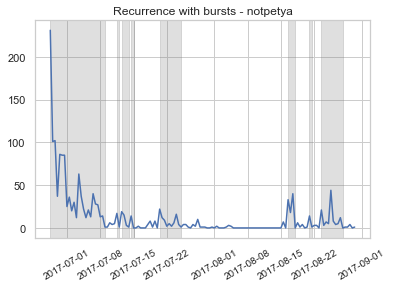

In [5]:
recurrence_measurements = ss.RecurrenceMeasurements(dataset, 
                                                    plot=True, plot_dir='./plots/')

Above, we see the recurrence plots for each of the four topics of interest: 'CVE-2015-1805', 'nmap', and 'notpetya'.

- 'CVE-2015-1805' has three large bursts of activity, one long and two short
- 'nmap' has multiple small bursts of activity.
- 'notpetya' has a long burst followed by several smaller bursts.

<a id=rundown></a>

<br>

## Rundown of Recurrence Measurements
[Jump to top](#top)


In [6]:
recurrence_measurements.list_measurements()

1) community_distribution_of_average_burst_size

2) community_distribution_of_average_number_of_users_per_burst

3) community_distribution_of_burst_lifetime

4) community_distribution_of_burst_platform_proportion

5) community_distribution_of_burst_timing_burstiness

6) community_distribution_of_new_users_per_burst

7) community_distribution_of_number_of_bursts

8) community_distribution_of_time_between_bursts

9) node_average_number_of_users_per_burst

10) node_average_proportion_of_top_platform_per_burst

11) node_average_size_of_each_burst

12) node_burstiness_of_burst_timing

13) node_lifetime_of_each_burst

14) node_new_users_per_burst

15) node_number_of_bursts

16) node_time_between_bursts

17) population_distribution_of_average_burst_size

18) population_distribution_of_average_number_of_users_per_burst

19) population_distribution_of_burst_lifetime

20) population_distribution_of_burst_platform_proportion

21) population_distribution_of_burst_timing_burstiness

22) population_

<br>

SocialSim has recurrrence measurements for multiple scales (or resolutions) of recurrence phenomena: node (e.g. informationID), community, and population. Here, we are going to focus primarily on the **node** and **population** level measurements:

### Node-Level Measurements

#### node_number_of_bursts

How many renewed bursts of activity are there?

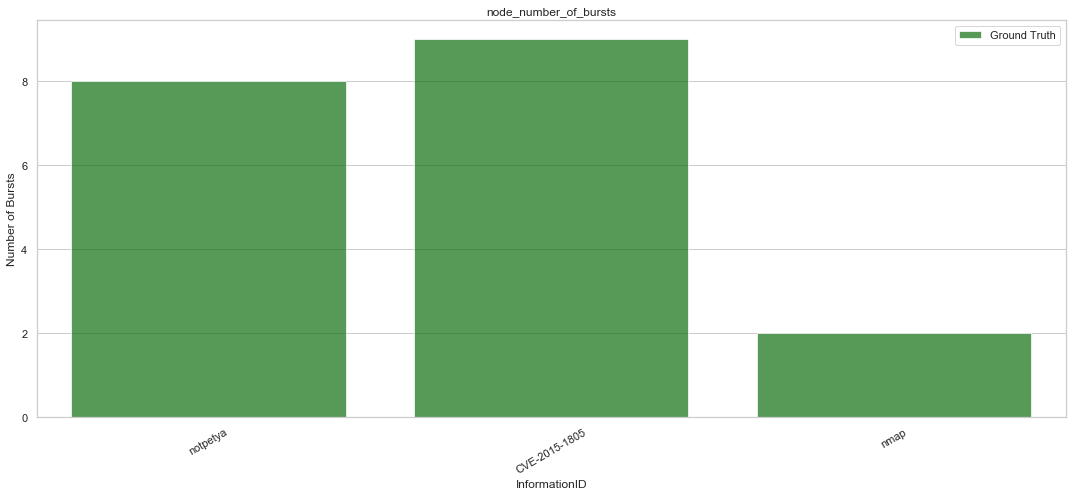

In [7]:
res =  recurrence_measurements.node_number_of_bursts() 
ss.generate_plot(res, measurement_name='node_number_of_bursts', show=True)

#### node_average_number_of_users_per_burst

How many users are reached by the information during each burst on average?

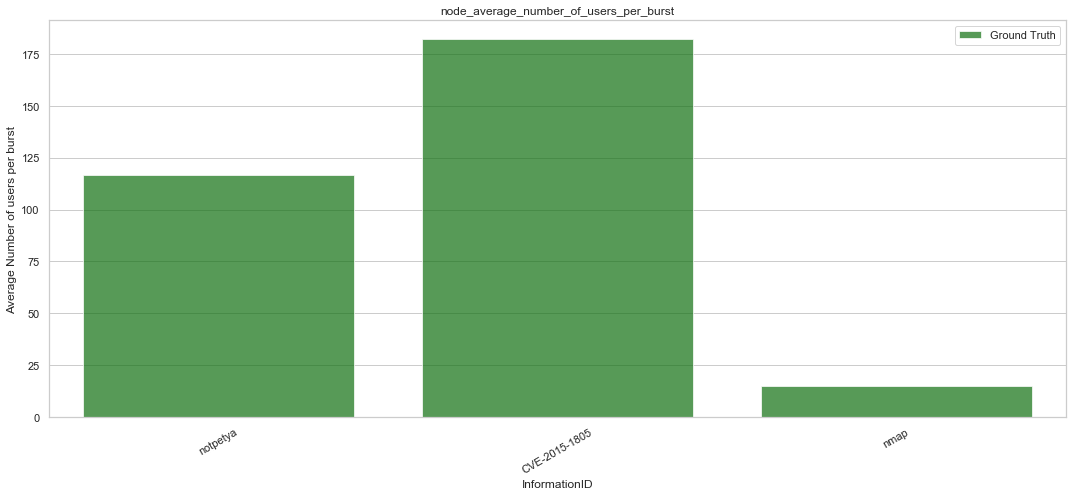

In [8]:
res =  recurrence_measurements.node_average_number_of_users_per_burst()
ss.generate_plot(res, measurement_name='node_average_number_of_users_per_burst', show=True)

#### node_average_proportion_of_top_platform_per_burst

Do individual bursts tend to occur on a single platform or are they distributed among platforms?

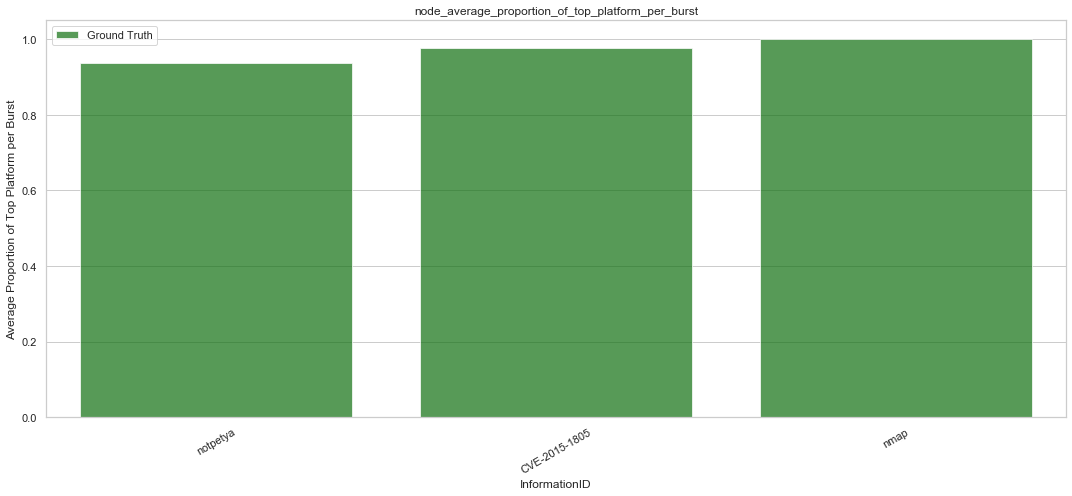

In [9]:
res =  recurrence_measurements.node_average_proportion_of_top_platform_per_burst()
ss.generate_plot(res, measurement_name='node_average_proportion_of_top_platform_per_burst', show=True)

#### node_average_size_of_each_burst

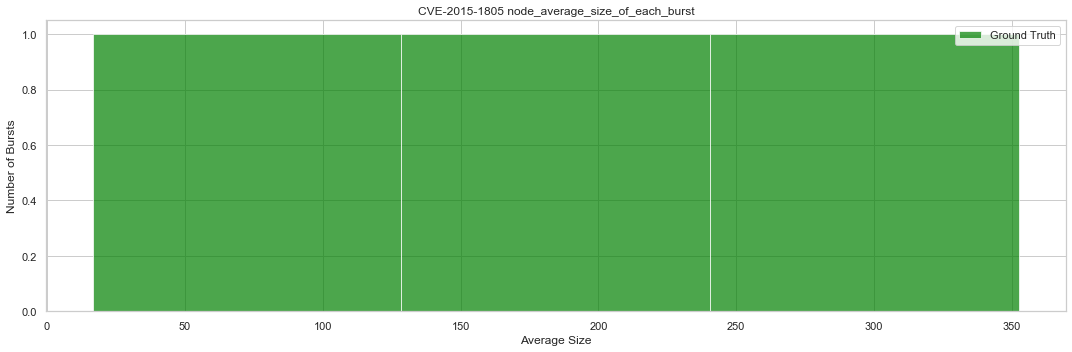

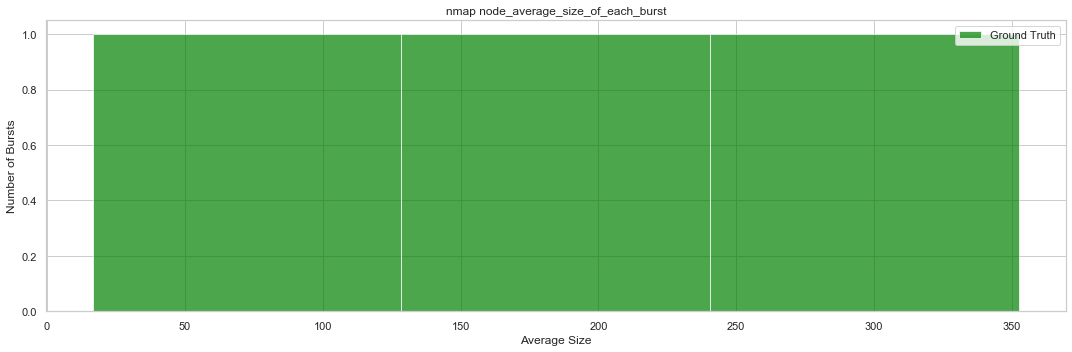

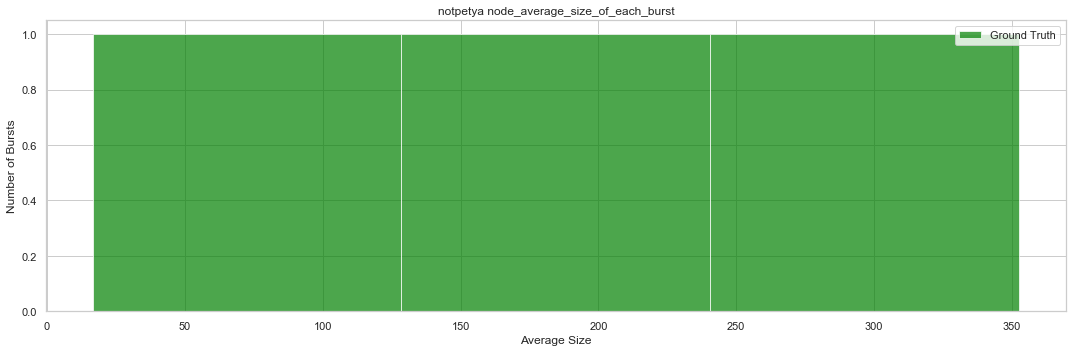

In [10]:
res =  recurrence_measurements.node_average_size_of_each_burst()
ss.generate_plot(res, measurement_name='node_average_size_of_each_burst', show=True)

#### node_burstiness_of_burst_timing

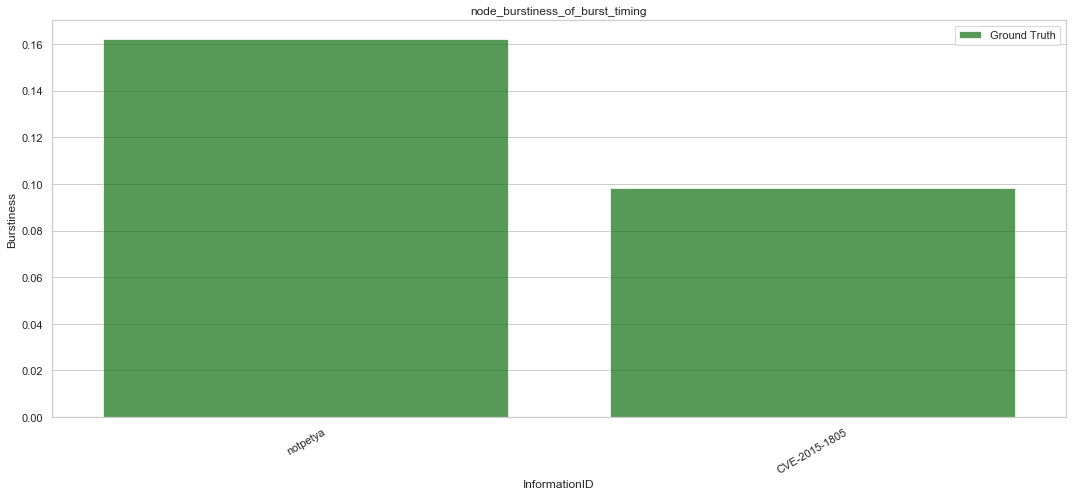

In [11]:
res =  recurrence_measurements.node_burstiness_of_burst_timing() 
ss.generate_plot(res, measurement_name='node_burstiness_of_burst_timing', show=True)

#### node_lifetime_of_each_burst

How long does each burst last on average?

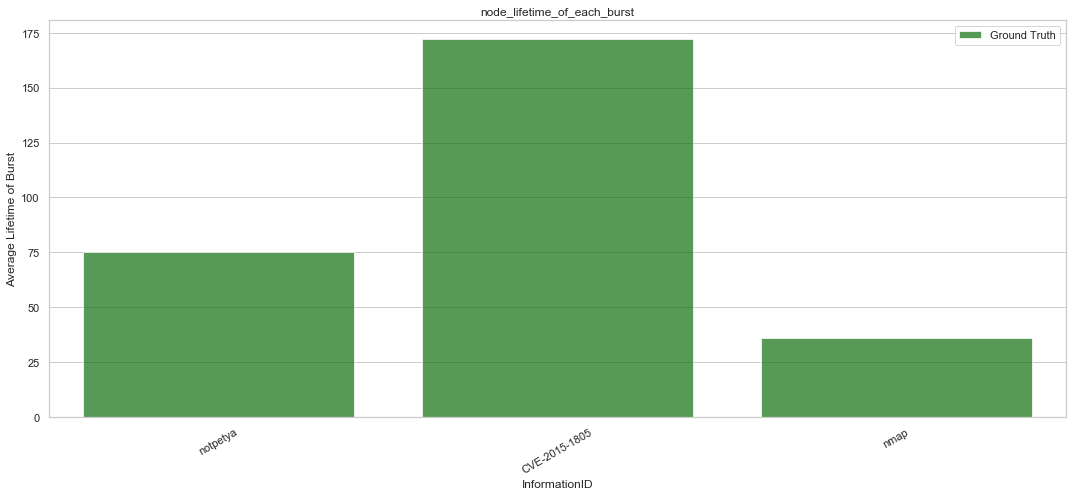

In [12]:
res =  recurrence_measurements.node_lifetime_of_each_burst() 
ss.generate_plot(res, measurement_name='node_lifetime_of_each_burst', show=True)

### Population Measurements

### population_distribution_of_average_burst_size

How does the number times is the information shared per burst vary across different pieces of information?

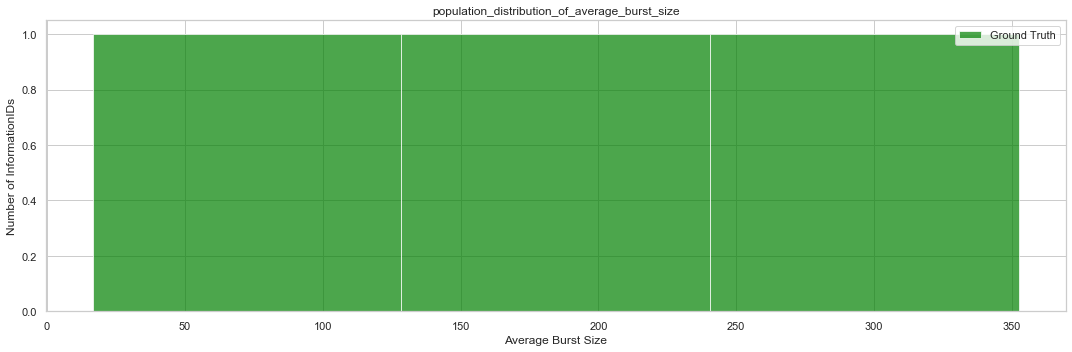

In [13]:
res =  recurrence_measurements.population_distribution_of_average_burst_size()
ss.generate_plot(res, measurement_name='population_distribution_of_average_burst_size', show=True)

### population_distribution_of_average_number_of_users_per_burst

How does the number of users reached during each burst vary across different pieces of information?

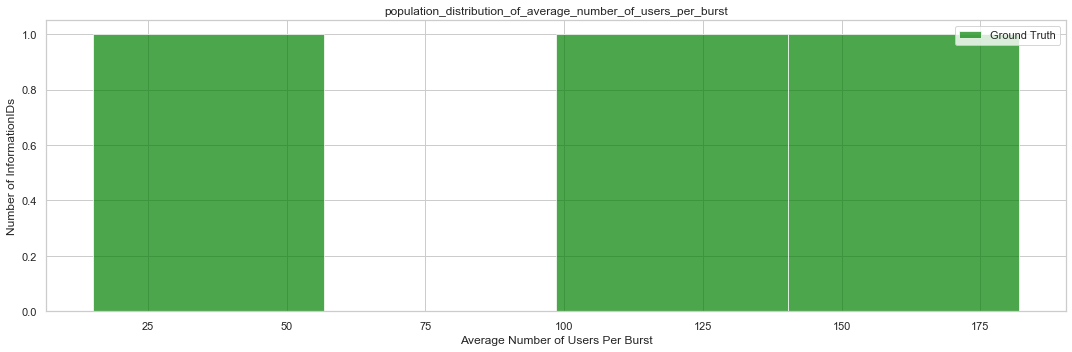

In [14]:
res =  recurrence_measurements.population_distribution_of_average_number_of_users_per_burst() 
ss.generate_plot(res, measurement_name='population_distribution_of_average_number_of_users_per_burst', show=True)

### population_distribution_of_burst_lifetime

How does the burst length vary across different pieces of information?

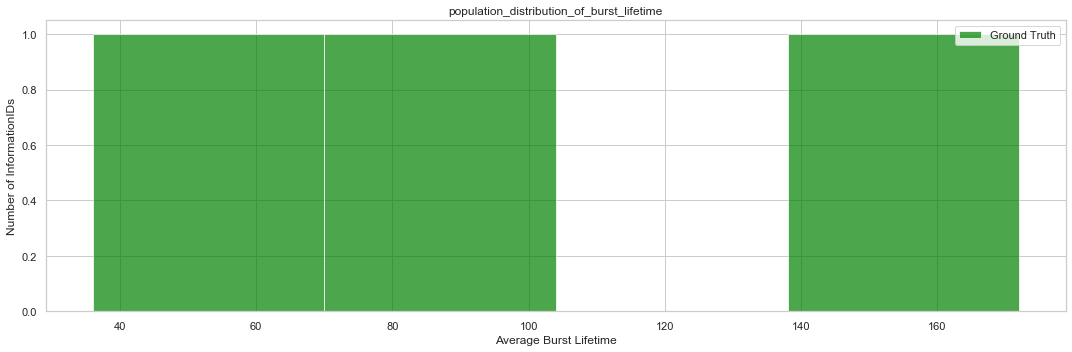

In [15]:
res =  recurrence_measurements.population_distribution_of_burst_lifetime() 
ss.generate_plot(res, measurement_name='population_distribution_of_burst_lifetime', show=True)

### population_distribution_of_burst_platform_proportion

How does the prominence of a single platform vary across different pieces of information?

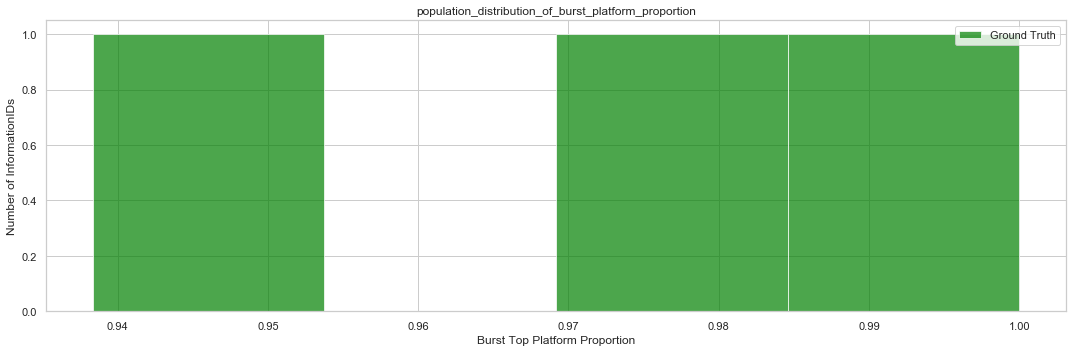

In [16]:
res =  recurrence_measurements.population_distribution_of_burst_platform_proportion() 
ss.generate_plot(res, measurement_name='population_distribution_of_burst_platform_proportion', show=True)

### population_distribution_of_new_users_per_burst

How does the number of new users reached during each burst vary across different pieces of information?

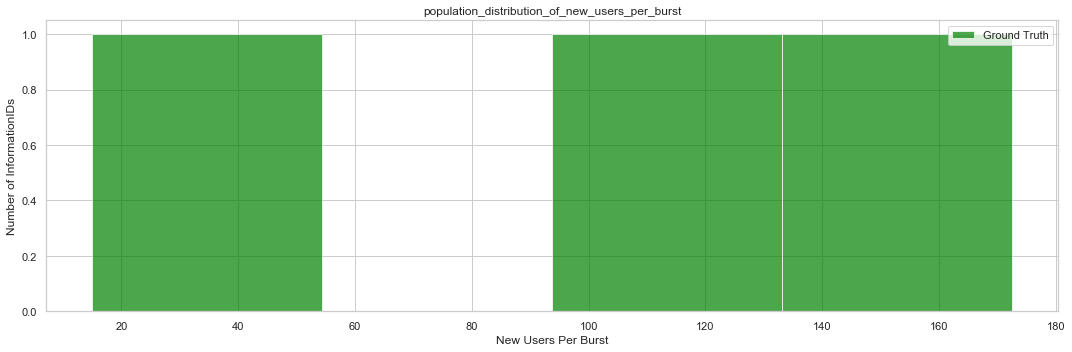

In [17]:
res =  recurrence_measurements.population_distribution_of_new_users_per_burst()  
ss.generate_plot(res, measurement_name='population_distribution_of_new_users_per_burst', show=True)

### population_distribution_of_number_of_bursts

How does the number of renewed bursts of activity vary across different pieces of information?

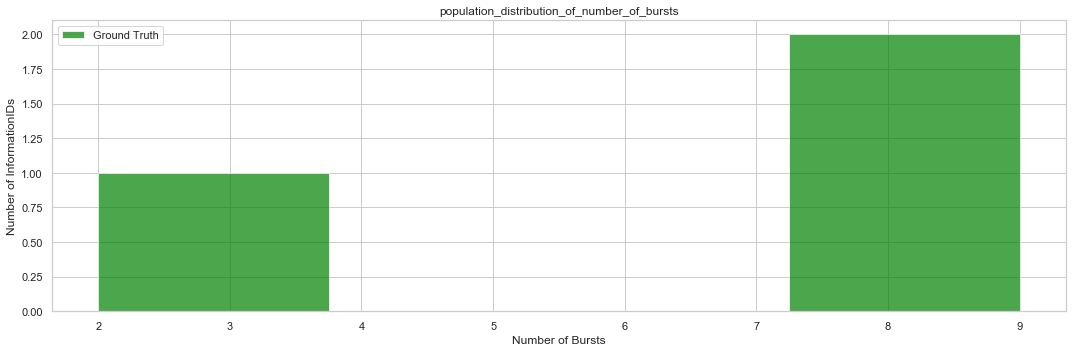

In [18]:
res =  recurrence_measurements.population_distribution_of_number_of_bursts() 
ss.generate_plot(res, measurement_name='population_distribution_of_number_of_bursts', show=True)

<a id=questions></a>

<br>

## Bonus Exercise
[Jump to top](#top)

For a bonus exercise, subset the data to the 'CVE-2015-0235' informationID. 


In [19]:
bonus_dataset_path = '../data/tutorial_recurrence_bonus.json' 
bonus_dataset = ss.load_data(bonus_dataset_path, verbose=False)


How many bursts of activity does this data have?


How many new users are in each burst?


How much time goes by between each burst of activity?